# Análisis de Componentes Principales (PCA) en Machine Learning

Es una técnica que lo que hace es **reducir la complejidad de los datos** manteniendo la mayor cantidad posible de la variación original.

Para complementar lo dicho por Federico en la clase, dado que el concepto es un poco abstracto, añado esta información desde la [Wikipedia](https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales):

El **análisis de componentes principales** (en español **ACP**, en inglés, **PCA**) es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables («componentes») no correlacionadas. Los _componentes se ordenan por la cantidad de varianza original_ que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.

Técnicamente, el ACP busca la proyección según la cual _los datos queden mejor representados en términos de [mínimos cuadrados](https://es.wikipedia.org/wiki/M%C3%ADnimos_cuadrados)_. Esta convierte un conjunto de observaciones de variables posiblemente correlacionadas en un conjunto de valores de variables sin correlación lineal llamadas **componentes principales**.

El ACP se emplea sobre todo en **[análisis exploratorio de datos](https://es.wikipedia.org/wiki/An%C3%A1lisis_exploratorio_de_datos)** y para construir **modelos predictivos**.

(...)

El ACP construye una transformación lineal que escoge un **nuevo sistema de coordenadas para el conjunto original** de datos en el cual **la varianza de mayor tamaño del conjunto de datos es capturada en el primer eje** (llamado el Primer Componente Principal), la segunda varianza más grande es el segundo eje, y así sucesivamente.

(...)

No obstante, se debe tener en cuenta que el ACP está limitado por la **suposición de linealidad**: Se asume que los datos observados son combinación lineal de una cierta base. Así también, los resultados dependen del escalado de las variables originales. Esto último puede ser subsanado en un proceso de **estandarización**, escalando cada característica por su desviación estándar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
x = iris.data
y = iris.target

In [5]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
# Estandarización (a.k.a. normalización) de los datos
x_standarized: np.ndarray = x - np.mean(x, axis=0)
x_standarized

array([[-7.43333333e-01,  4.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01, -5.73333333e-02, -2.35800000e+00,
        -9.99333333e-01],
       [-1.14333333e+00,  1.42666667e-01, -2.45800000e+00,
        -9.99333333e-01],
       [-1.24333333e+00,  4.26666667e-02, -2.25800000e+00,
        -9.99333333e-01],
       [-8.43333333e-01,  5.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-4.43333333e-01,  8.42666667e-01, -2.05800000e+00,
        -7.99333333e-01],
       [-1.24333333e+00,  3.42666667e-01, -2.35800000e+00,
        -8.99333333e-01],
       [-8.43333333e-01,  3.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.44333333e+00, -1.57333333e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01,  4.26666667e-02, -2.25800000e+00,
        -1.09933333e+00],
       [-4.43333333e-01,  6.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.04333333e+00,  3.42666667e-01, -2.15800000e+00,
      

In [14]:
pca: PCA = PCA(n_components=2)
x_pca: np.ndarray = pca.fit_transform(x_standarized)

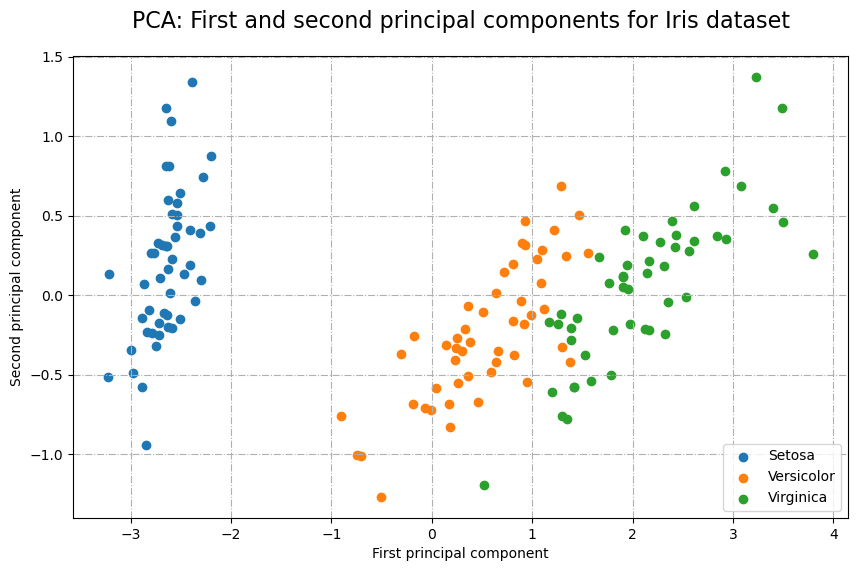

In [18]:
# Testing
species: list[str] = ['Setosa', 'Versicolor', 'Virginica']

plt.figure(figsize=(10, 6))
for i in range(len(species)):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], label=species[i])
plt.title(
    'PCA: First and second principal components for Iris dataset',
    fontsize=16,
    pad=20
)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.grid(True, linestyle='-.')
plt.legend()
plt.show()

Como hemos visto, **PCA** es muy útil para visualizar un conjunto de datos de muchas dimensiones (e.g. 4D para `Iris`, teniendo en cuenta _ancho de pétalos_, _largo de pétalos_, _ancho de sépalos_ y _largo de sépalos_) en 2D o 3D, dependiendo de la medición a realizar y el gráfico escogido (aquí, en un típico gráfico `scatter` 2D).

Cada eje del gráfico muestra una regla generada por el modelo (primera regla y segunda regla en este caso). Las reglas son independientes entre sí (no están correlacionadas: la primera es diferente a la segunda) y cada una representa las diferencias más significativas que el modelo ha encontrado en función de los datos. La varianza se distribuye en los componentes principales.

Así, decimos que el PCA es un algoritmo no supervisado, pues trabaja con datos que no han sido previamente etiquetados o que tengan respuestas predeterminadas, y el modelo ha tenido que descubrir por sí mismo los patrones subyacentes en los mismos datos para dar la respuesta esperada. Es decir, no devuelve una nueva categorización, sino una nueva representación de los datos, destacando su estructura inherente.